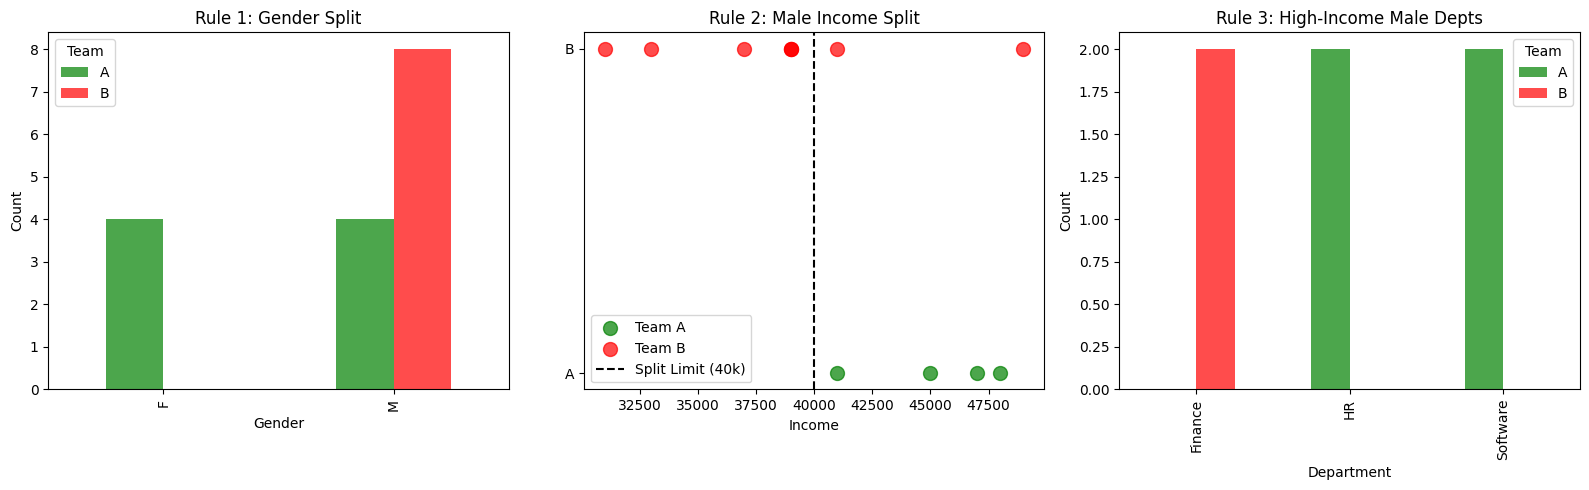

Accuracy: 100.00%


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("https://raw.githubusercontent.com/krishnamnuwal/Gradient_Gains/refs/heads/main/Data/Dataset_2%20-%20Sheet1.csv")

fig, axes = plt.subplots(1, 3, figsize=(16, 5))
gender_counts = df.groupby(['Gender', 'Team']).size().unstack(fill_value=0)
gender_counts.plot(kind='bar', ax=axes[0], color=['green', 'red'], alpha=0.7)
axes[0].set_title('Rule 1: Gender Split')
axes[0].set_ylabel('Count')
males = df[df['Gender'] == 'M']

for team, color in [('A', 'green'), ('B', 'red')]:
    subset = males[males['Team'] == team]
    axes[1].scatter(subset['Income'], subset['Team'], label=f'Team {team}', s=100, color=color, alpha=0.7)

axes[1].axvline(x=40000, color='black', linestyle='--', label='Split Limit (40k)')
axes[1].set_title('Rule 2: Male Income Split')
axes[1].set_xlabel('Income')
axes[1].legend()

high_earning_males = males[males['Income'] > 40000]
dept_counts = high_earning_males.groupby(['Department', 'Team']).size().unstack(fill_value=0)
dept_counts.plot(kind='bar', ax=axes[2], color=['green', 'red'], alpha=0.7)
axes[2].set_title('Rule 3: High-Income Male Depts')
axes[2].set_ylabel('Count')

plt.tight_layout()
plt.show()


def predict_team(row):
    if row['Gender']=='F':
        return 'A'

    if row['Income']<= 40000:
        return 'B'

    if row['Department']=='Finance':
        return 'B'
    else:
        return 'A'

df['Predicted_Team'] = df.apply(predict_team, axis=1)
accuracy = (df['Predicted_Team'] == df['Team']).mean()
print(f"Accuracy: {accuracy * 100:.2f}%")

# 1.All females are Team A ...can be confirmed by graph 1

# 2.All Finance sector males are in team B can be confirmed by graph 3

# 3.and for the the males in remaining sector is decided on the basis of income level by graph 2

# I have uploaded my Decision tree pic on Github Repo itself

**1.All females are Team A ...can be confirmed by graph 1**


**2.All Finance sector males are in team B can be confirmed by graph 3**

**3.and for the the males in remaining sector is decided on the basis of income level by graph 2**